In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa
from sklearn.decomposition import PCA

In [2]:
NUM_POINTS = 100

In [3]:
generator = tf.keras.models.load_model('snare_drum_generator.h5')
pre_trained_generator = tf.keras.models.load_model('pre_trained_generator.h5')

In [4]:
noise = tf.random.normal([NUM_POINTS, 100])
generated_audio = generator(noise, training=False)
pre_trained_audio = pre_trained_generator(noise, training=False)

In [5]:
train_audio = np.load('./snares.npy')

In [6]:
train_audio = train_audio.reshape(train_audio.shape[0], 16384, 1).astype('float32')

# Normalize
peak = max(abs(train_audio.max()), abs(train_audio.min()))
train_audio /= peak

In [7]:
selection = np.random.choice(train_audio.shape[0], size=NUM_POINTS)
snares = train_audio[selection]

In [8]:
real = []
generated = []
pre_train = []
for i in range(NUM_POINTS):
    mfccs_real = librosa.feature.mfcc(y=snares[i,:,0], sr=16000)
    real.append(np.concatenate((mfccs_real.mean(0), mfccs_real.std(0))))
    
    mfccs_gen = librosa.feature.mfcc(y=np.array(generated_audio[i,:,0]), sr=16000)
    generated.append(np.concatenate((mfccs_gen.mean(0), mfccs_gen.std(0))))
    
    mfccs_pre = librosa.feature.mfcc(y=np.array(pre_trained_audio[i,:,0]), sr=16000)
    pre_train.append(np.concatenate((mfccs_pre.mean(0), mfccs_pre.std(0))))
    

real = np.array(real)
generated = np.array(generated)
pre_train = np.array(pre_train)

In [13]:
all_samples = np.concatenate((real, generated, pre_train))


(300, 66)

In [15]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_samples)

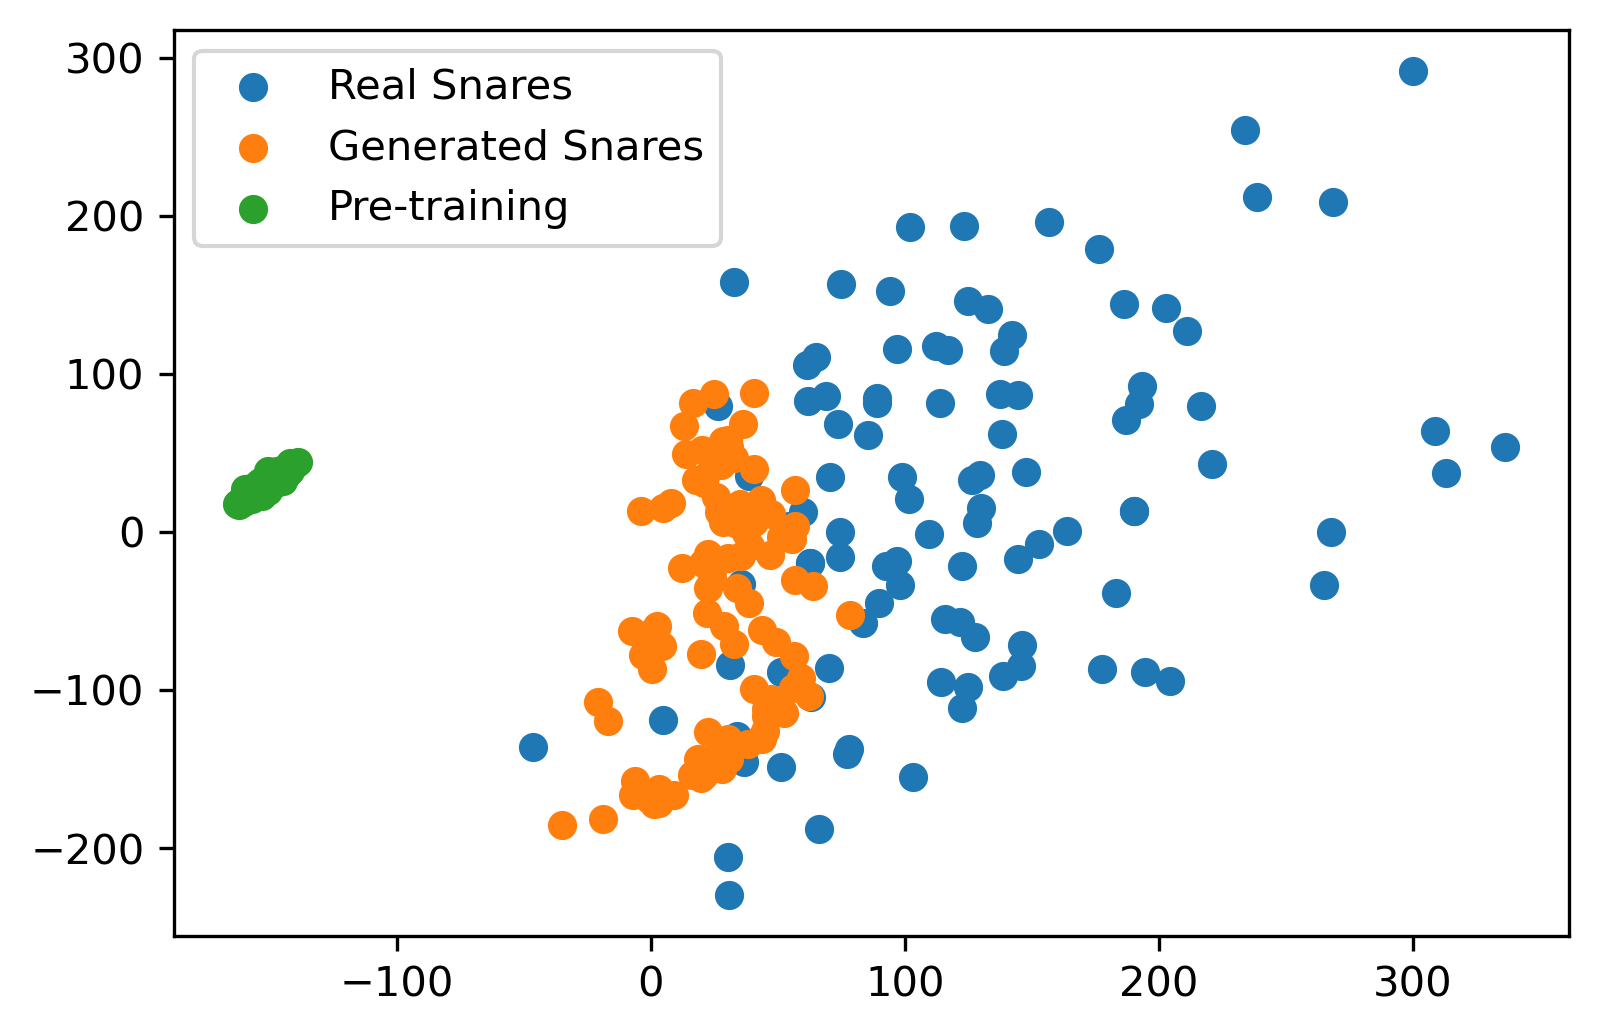

In [17]:
plt.figure(dpi=300)
plt.scatter(reduced[0:100,0], reduced[0:100,1], label="Real Snares")
plt.scatter(reduced[100:200,0], reduced[100:200,1], label="Generated Snares")
plt.scatter(reduced[200:300,0], reduced[200:300,1], label="Pre-training")
plt.legend()

plt.savefig('./audio_gan_pca_plot.png')